# Descriptive analysis of officers-shot data

Simply summarizes the data, sliced in myriad ways

### PRO TIP: Just skim for the graphs if you are only interested in the results

##### Author: Everett Wetchler (everett.wetchler@gmail.com)

## Setup and read data

In [1]:
DTW_PROJECT_KEY = 'tji/auxiliary-datasets'
OIS_FILENAME = '../../data-processing/data/clean/shot_officers.csv'
SAVE_PLOTS = True
PLOT_DIR= '../plots/'
PLOT_PREFIX = 'ois_officers_'

In [2]:
from lib import eda

/Users/everettwetchler/.virtualenvs/tji-analysis/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
####################################################
# Boilerplate import/setup code for general analysis
# everett.wetchler@gmail.com
####################################################

import datetime as dt
import os
import random

import datadotworld as dw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Jupyter setup
%matplotlib inline

## Graphical setup
# Useful colors to reference
SNS_BLUE, SNS_GREEN, SNS_RED, SNS_PURPLE, SNS_YELLOW, SNS_CYAN = sns.color_palette()
SNS_COLORS = sns.color_palette()
mpl.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

# Watermark extension to print version/system information
# Flags:
# -a [author] -d (date) -t (time) -z (timezone) -r (repo)
# -g (git hash) -w (watermark version) -p [packages] (package info)
%load_ext watermark
%watermark -a "Everett Wetchler" -d -t -z -w -p numpy,pandas,matplotlib,datadotworld

####################################################
# END Boilerplate
####################################################

Everett Wetchler 2018-05-12 23:50:40 CDT

numpy 1.14.3
pandas 0.20.1
matplotlib 2.2.0
datadotworld 1.6.0
watermark 1.5.0


In [4]:
# Helper function to (optionally) save and name plots)
plotcount = 0
def saveplot(fig, name):
    if SAVE_PLOTS:
        global plotcount
        plotcount += 1
        filename = os.path.join(PLOT_DIR, PLOT_PREFIX + "%02d_%s.png" % (plotcount, name))
        fig.savefig(filename)

if SAVE_PLOTS:
    prev_plots = [f for f in os.listdir(PLOT_DIR) if f.startswith(PLOT_PREFIX)]
    print("Removing %d past plots" % len(prev_plots))
    for f in prev_plots:
        os.remove(os.path.join(PLOT_DIR, f))

Removing 10 past plots


In [5]:
shootings = pd.read_csv(OIS_FILENAME)

for c in shootings.columns:
    if c.startswith('date'):
        shootings[c] = pd.to_datetime(shootings[c])

first_shooting = shootings.date_incident.min().strftime('%Y-%m-%d')
last_shooting = shootings.date_incident.max().strftime('%Y-%m-%d')
print("Officers shot data from %s to %s" % (first_shooting, last_shooting))

shootings.head()

Officers shot data from 2015-10-06 to 2018-03-25


,date_ag_received,date_incident,incident_address,incident_city,incident_county,incident_latitude,incident_longitude,incident_zip,officer_died,officer_name_first,officer_name_last,officer_age,officer_race,officer_gender,agency_name_1,agency_city_1,agency_county_1,agency_zip_1,agency_report_date_1,agency_name_person_filling_out_1,agency_email_person_filling_out_1,agency_name_2,agency_city_2,agency_county_2,agency_zip_2,agency_report_date_2,agency_name_person_filling_out_2,agency_email_person_filling_out_2,civilian_died,civilian_suicide,civilian_name_first_1,civilian_name_last_1,civilian_age_1,civilian_race_1,civilian_gender_1,civilian_name_first_2,civilian_name_last_2,civilian_age_2,civilian_race_2,civilian_gender_2,civilian_name_first_3,civilian_name_last_3,civilian_age_3,civilian_race_3,civilian_gender_3,media_link_1,media_link_2,media_link_3
0,NaT,2015-10-06,815 LAMAR DRIVE,SEGUIN,GUADALUPE,29.576609,-97.947667,78155,False,NaN,NaN,54.0,WHITE,F,SEGUIN POLICE DEPT,SEGUIN,GUADALUPE,78155,10/26/2015,MC MEYERS,MCMEYERS@SEGUINTEXAS.GOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,WHITE,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,2015-10-30,8000 MIDCROWN,SAN ANTONIO,BEXAR,29.507478,-98.380029,78218,False,JOSEPH,CANALES,42.0,HISPANIC,M,BEXAR CO SHERIFFS OFFICE,SAN ANTONIO,BEXAR,78207,11/3/2015,DET. FRANK STUBBS #4048,SSTUBBS@BEXAR.ORG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHERMAN,ROBINSON,36.0,BLACK,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MYSA,NEWS4SANANTONIO,NaN
2,2017-02-21,2015-11-01,301 W. AVENUE B,TEMPLE,BELL,31.095688,-97.344775,76501,True,DARRELL,ALLEN,42.0,BLACK,M,MARLIN POLICE DEPT,MARLIN,FALLS,76661,2/21/2017,DAMIEN EAGLIN,CHIEFEAGLIN@MARLINTX.NET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WACO TRIBUNE-HERALD,NaN,NaN
3,NaT,2015-12-23,1025 CUSTER AVE.,ODESSA,ECTOR,31.865143,-102.335850,79761,False,PETE,GONZALES,42.0,HISPANIC,M,ODESSA POLICE DEPT,ODESSA,ECTOR,79761,12/29/2015,SGT. DAVID LARA,DLARA@ODESSA-TX.GOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ROY DANIEL,GARZA,27.0,HISPANIC,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CBS 7,BIG COUNTRY,NaN
4,NaT,2015-12-23,1025 CUSTER AVE.,ODESSA,ECTOR,31.865143,-102.335850,79761,False,CORY,WESTER,38.0,WHITE,M,ODESSA POLICE DEPT,ODESSA,ECTOR,79761,12/29/2015,SGT. DAVID LARA,DLARA@ODESSA-TX.GOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ROY DANIEL,GARZA,27.0,HISPANIC,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CBS 7,BIG COUNTRY,NaN


## WHEN do shootings happen?

In [6]:
shootings['year'] = shootings['date_incident'].apply(lambda dt: '%d' % (dt.year))
shootings['month'] = shootings['date_incident'].apply(lambda dt: '%d-%02d' % (dt.year, dt.month))

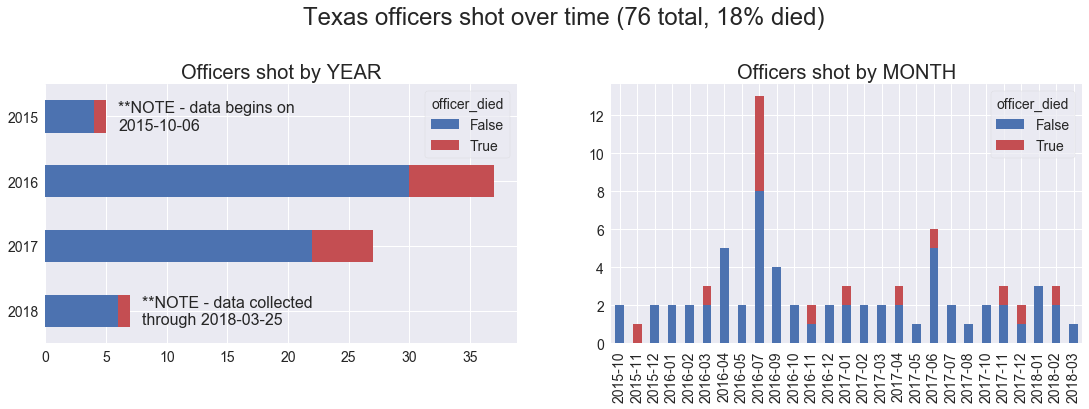

In [7]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(16, 6)
fig.suptitle('Texas officers shot over time (%d total, %.0f%% died)' % (
    len(shootings), shootings['officer_died'].mean() * 100), fontsize=24)
ax=axes[0]
ax.set_title('Officers shot by YEAR')
shootings.groupby(['year', 'officer_died']).size().unstack()[::-1].plot(
    kind='barh', stacked=True, ax=ax, color=[SNS_BLUE, SNS_RED])
ax.set_ylabel('')
ax.text(6, 3, '**NOTE - data begins on\n' + first_shooting, verticalalignment='center', fontsize=16)
ax.text(8, 0, '**NOTE - data collected\nthrough ' + last_shooting, verticalalignment='center', fontsize=16)

ax=axes[1]
shootings.groupby(['month', 'officer_died']).size().unstack().plot(
    kind='bar', stacked=True, ax=ax, color=[SNS_BLUE, SNS_RED])
ax.set_title('Officers shot by MONTH')
ax.set_xlabel('')
plt.subplots_adjust(left=.05, right=.95, bottom=0.2, top=0.8)
saveplot(fig, 'year_month')

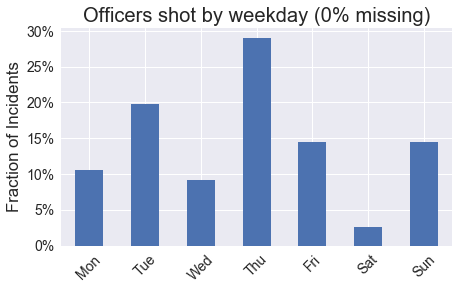

In [8]:
fig, ax = plt.subplots()

fig.set_size_inches(7, 4)
counts = shootings['date_incident'].apply(lambda dt: dt.weekday()).value_counts(True).sort_index()
ax.set_ylabel('Fraction of Incidents')
eda.percentify_y(ax, decimals=0)
counts.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
counts.plot(kind='bar', ax=ax)
ax.set_title('Officers shot by weekday (%.0f%% missing)' % (shootings.date_incident.isnull().mean() * 100))
plt.xticks(rotation=45)
saveplot(fig, 'weekday')

## WHERE do shootings happen?

In [9]:
datasets = dw.load_dataset(DTW_PROJECT_KEY, force_update=True)
county_seats = datasets.dataframes['texas_counties'].set_index('county')['seat']
county_seats.head()

county
ANDERSON      PALESTINE
ANDREWS         ANDREWS
ANGELINA         LUFKIN
ARANSAS        ROCKPORT
ARCHER      ARCHER CITY
Name: seat, dtype: object

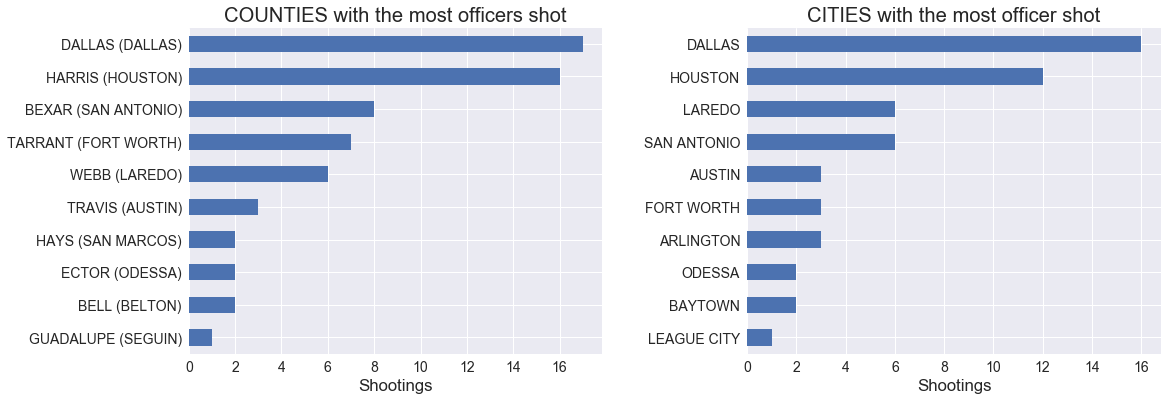

In [10]:
top_counties = shootings.incident_county.value_counts().head(10)
top_counties.index = pd.Series(top_counties.index).apply(
    lambda county: "%s (%s)" % (county, county_seats[county]))

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(18, 6)

ax = axes[0]
top_counties[::-1].plot(kind='barh', ax=ax)
ax.set_title('COUNTIES with the most officers shot')
ax.set_xlabel("Shootings")

ax = axes[1]
shootings['incident_city'].value_counts()[:10][::-1].plot(kind='barh', ax=ax)
ax.set_title("CITIES with the most officer shot")
ax.set_xlabel("Shootings")

plt.subplots_adjust(left=0.2, wspace=.35, right=.95)
saveplot(fig, 'shootings_by_location')

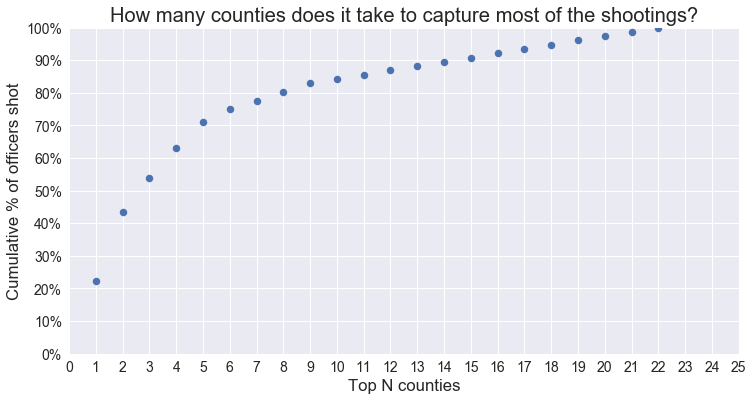

In [11]:
fig, ax = plt.subplots(1)
s = shootings['incident_county'].value_counts(True, ascending=False)
s.index = range(1, len(s) + 1)
s.cumsum().plot(ax=ax, marker='.', linewidth=0, markersize=15)
ax.set_ylim((0, 1))
ax.set_yticks(np.arange(0, 1.01, .1))
ax.set_yticklabels(['%d%%' % i for i in range(0, 101, 10)])
ax.set_xticks(range(0, int(ax.get_xlim()[1]) + 5, 5))
ax.legend_ = None
ax.set_title('How many counties does it take to capture most of the shootings?')
ax.set_xlabel('Top N counties')
ax.set_ylabel('Cumulative % of officers shot')
ax.set_xticks(list(range(0, int(ax.get_xlim()[1]) + 1)))
fig.set_size_inches(12, 6)
saveplot(fig, 'cumulative_shootings_by_county')

## What officers get shot?

/Users/everettwetchler/.virtualenvs/tji-analysis/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


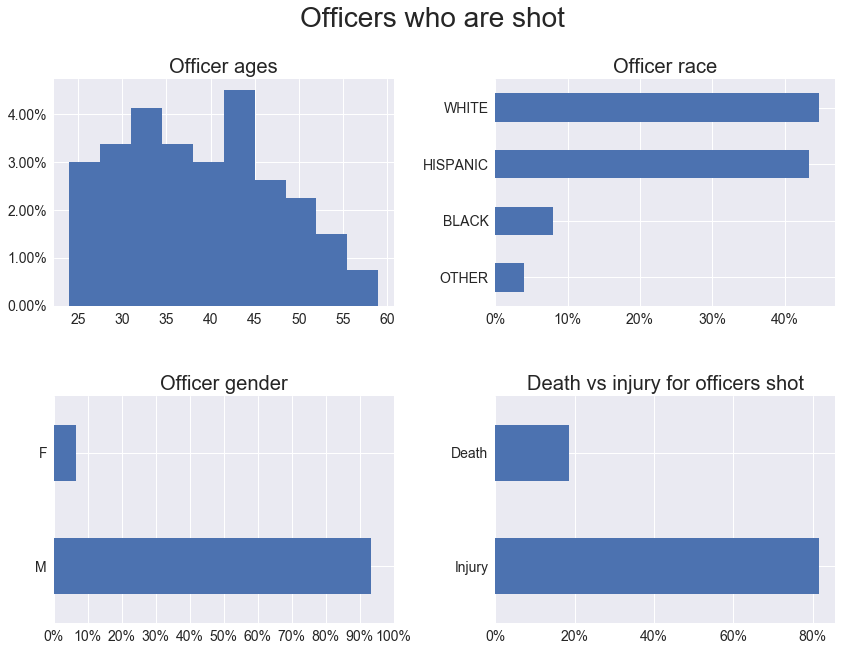

In [12]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(14, 10)
fig.suptitle('Officers who are shot', fontsize=28)

ax = axes[0][0]
shootings.officer_age.hist(ax=ax, normed=True)
ax.set_title('Officer ages')
eda.percentify_y(ax)

ax = axes[0][1]
shootings.officer_race.value_counts(True)[::-1].plot(kind='barh', ax=ax)
ax.set_title('Officer race')
eda.percentify_x(ax, decimals=0)

ax = axes[1][0]
shootings.officer_gender.value_counts(True).plot(kind='barh', ax=ax)
ax.set_xticks(np.arange(0, 1.01, .1))
ax.set_title('Officer gender')
eda.percentify_x(ax)

ax = axes[1][1]
shootings['officer_died'].value_counts(True).plot(kind='barh', ax=ax)
ax.set_yticklabels([ 'Death' if t.get_text() == 'True' else 'Injury' for t in ax.get_yticklabels()])
eda.percentify_x(ax)
ax.set_title('Death vs injury for officers shot')

plt.subplots_adjust(hspace=0.4, wspace=.3)
saveplot(fig, 'officer_summary')

## What civilians are involved?

/Users/everettwetchler/.virtualenvs/tji-analysis/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


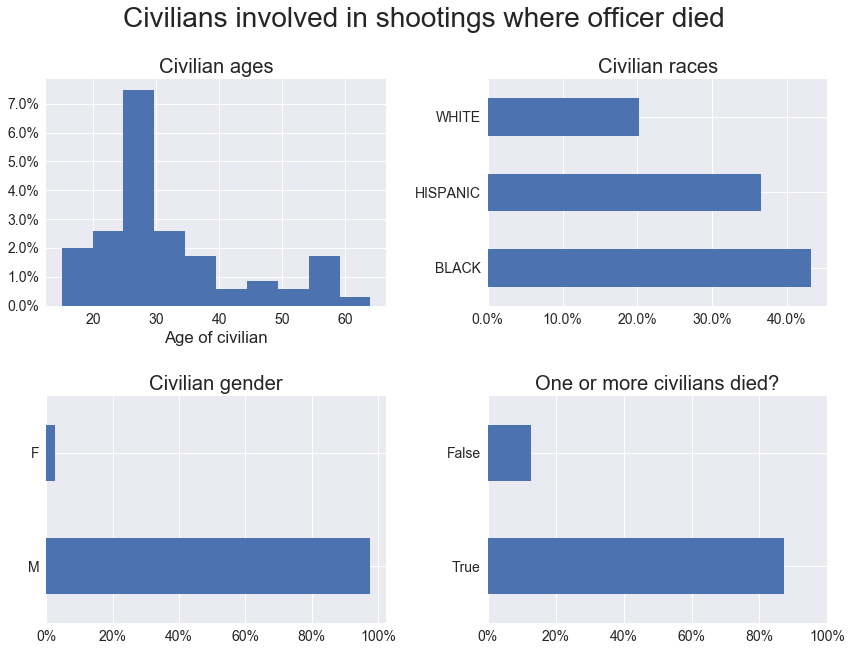

In [13]:
all_civilian_ages = []
all_civilian_races = []
all_civilian_genders = []
for i in range(1, 4):
    all_civilian_ages.extend(list(shootings['civilian_age_%d' % i].dropna()))
    all_civilian_races.extend(list(shootings['civilian_race_%d' % i].dropna()))
    all_civilian_genders.extend(list(shootings['civilian_gender_%d' % i].dropna()))

all_civilian_ages = pd.Series(all_civilian_ages)
all_civilian_races = pd.Series(all_civilian_races)
all_civilian_genders = pd.Series(all_civilian_genders)

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(14, 10)
fig.suptitle('Civilians involved in shootings where officer died', fontsize=28)

ax = axes[0][0]
all_civilian_ages.hist(ax=ax, normed=True)
ax.set_title('Civilian ages')
ax.set_xlabel('Age of civilian')
eda.percentify_y(ax)

ax = axes[0][1]
all_civilian_races.value_counts(True).plot(kind='barh', ax=ax)
ax.set_title('Civilian races')
eda.percentify_x(ax)

ax = axes[1][0]
all_civilian_genders.value_counts(True).plot(kind='barh', ax=ax)
ax.set_title('Civilian gender')
eda.percentify_x(ax)

ax = axes[1][1]
shootings['civilian_died'].value_counts(True).plot(kind='barh', ax=ax)
ax.set_title('One or more civilians died?')
ax.set_xlim((0, 1))
eda.percentify_x(ax)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
saveplot(fig, 'civilian_summary')